In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score


import random
random.seed(9001)    



https://www.kaggle.com/saxinou/imbalanced-data-xgboost-tunning

In [20]:
def Init_GMM_2(n_ind=1000.0, p=[0.05, 0.95]):
    n_fraude=int(n_ind*p[0])
    n_ok= int(n_ind - n_fraude)

    colonnes=['X0','X1']

    mean1 = [0,0] #
    cov1 = [[1,3],[0,10]]#
    data_fraude=pd.DataFrame(np.random.multivariate_normal(mean1,cov1,int(n_fraude/2)), columns=colonnes)
    data_fraude['FRAUDE']=1
    
    mean3 = [4,0]#
    cov3 = [[1,3],[0,10]]#
    data_fraude2=pd.DataFrame(np.random.multivariate_normal(mean3,cov3,int(n_fraude/2)), columns=colonnes)
    data_fraude2['FRAUDE']=1
    
    mean2 = [2,2]#
    cov2 = [[1,3],[0,10]]#
    data_ok=pd.DataFrame(np.random.multivariate_normal(mean2,cov2,n_ok), columns=colonnes)
    data_ok['FRAUDE']=0
    
    data = pd.concat([data_fraude, data_ok, data_fraude2])
    data = data.reset_index(drop=True)
    
    return data, colonnes, 'FRAUDE'


def Nuage(X, feature1, feature2, type_i='FRAUDE'):
    if type_i not in data.columns:
        print(type_i," non disponible")
        return
    
    TF = X[ X[type_i]==1 ]
    TO = X[ X[type_i]==0 ]

    plot1 = plt.scatter(TF[feature1], TF[feature2], color='b', marker='x', label='Fraude')
    plot2 = plt.scatter(TO[feature1], TO[feature2], color='r', marker='.', label='OK')
                       
    plt.legend(handles = [plot1, plot2], loc='best')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(type_i)
    plt.show()

In [21]:
# Creation de la base
data, predictors, target = Init_GMM_2(n_ind=11000)    

print(predictors)

data[:5]

['X0', 'X1']


D:\ProgramData\Anaconda3\envs\mybase3.6\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\envs\mybase3.6\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
D:\ProgramData\Anaconda3\envs\mybase3.6\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.


,X0,X1,FRAUDE
0,-1.111683,1.278501,1
1,1.084833,-3.076667,1
2,-0.283788,2.824526,1
3,-0.613392,-4.390576,1
4,0.600583,-1.011224,1


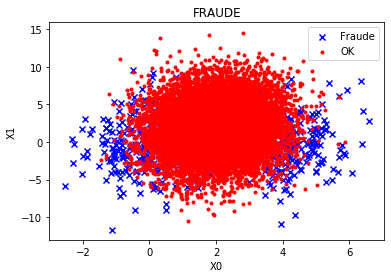

n_fraudes =  550
n_ok =  10450


In [22]:
# Affichage du nuage de point
Nuage(data,'X0','X1', target)

# Affichage des caracteristiques de la base
n0 = len(data[data[target]==0]) 
n1 = len(data[data[target]==1])
print("n_fraudes = ",n1)
print("n_ok = ",n0)

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

# Create your target and design matrix
y = data[target]
X = data[predictors]

In [24]:
# Create train and test set 
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)
print("Taille des predictor sur le train set : ", train_X.shape)
print("Taille de la target sur le train set : ", train_y.shape)
print("Taille des predictor sur le test set : ", test_X.shape)
print("Taille de la target sur le test set : ", test_y.shape)



Taille des predictor sur le train set :  (8250, 2)
Taille de la target sur le train set :  (8250,)
Taille des predictor sur le test set :  (2750, 2)
Taille de la target sur le test set :  (2750,)


D:\ProgramData\Anaconda3\envs\mybase3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [25]:
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

D:\ProgramData\Anaconda3\envs\mybase3.6\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# XGBOOST


In [26]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

[22:43:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:
# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance AUC train : ", auc)
train_y_pred



Performance AUC train :  0.9111263207274081


array([0.06277606, 0.00838259, 0.01029161, ..., 0.00838259, 0.12083465,
       0.06669769], dtype=float32)

In [28]:
# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance AUC test : ", auc)

Performance AUC test :  0.8805787023308227


# When you observe high training accuracy, but low tests accuracy, it is likely that you encounter overfitting problem.

There are in general two ways that you can control overfitting in xgboost :

    The first way is to directly control model complexity◦This include max_depth, min_child_weight and gamma
    
    The second way is to add randomness to make training robust to noise◦This include subsample, colsample_bytree
    
    You can also reduce stepsize eta, but needs to remember to increase num_round when you do so



In [29]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=2, 
             eval_set=[(test_X, test_y)], verbose=False)

[22:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance AUC@train at n_estimators=1000 : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance @test at n_estimators=1000 : ", auc)


Performance AUC@train at n_estimators=1000 :  0.894436468100944
Performance @test at n_estimators=1000 :  0.8830017001759484


# Step 1 : Fix learning rate and number of estimators for tuning tree-based parameters

    max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
    
    min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
    
    gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
    
    subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
    
    scale_pos_weight = 1: Because of high class imbalance.



In [33]:
# Step 1 : Fix learning rate and number of estimators for tuning tree-based parameters
xgb1 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
# modelfit(xgb1, train, train_X)
xgb1.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb1.predict(train_X))
print("Performance train Step 1 : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb1.predict(test_X))
print("Performance test Step 1 : ", auc)



Performance train Step 1 :  0.8346435069835723
Performance test Step 1 :  0.622808058043216


# Step 2: Tune max_depth and min_child_weight

Important Note : I’ll be doing some heavy-duty grid searched in this section which can take a long time (depending on your system).


In [38]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  #n_estimators=1000, 
                                                   n_estimators=200, 
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch1.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, retur

In [40]:
gsearch1.cv_results_

{'mean_fit_time': array([1.03858781, 1.19205136, 1.2456975 , 1.58038192, 1.63804183,
        1.4472724 , 1.90488396, 1.98242836, 1.83677788, 2.14656816,
        2.32918682, 2.28939724]),
 'std_fit_time': array([0.05125503, 0.07159019, 0.04779018, 0.06063343, 0.08103386,
        0.01404607, 0.00948494, 0.05411922, 0.01856233, 0.05018248,
        0.30452245, 0.26601325]),
 'mean_score_time': array([0.01552725, 0.01249981, 0.01405139, 0.01272545, 0.01472616,
        0.01180291, 0.01561532, 0.01592503, 0.01477537, 0.0152514 ,
        0.01620092, 0.01420245]),
 'std_score_time': array([3.25661147e-03, 6.24990467e-03, 1.43452897e-03, 2.55120411e-03,
        1.89652612e-03, 2.13612973e-03, 2.00830542e-05, 3.52489620e-03,
        9.98136676e-03, 3.06213782e-04, 7.48927894e-04, 7.45181495e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

In [42]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 5}

In [43]:
gsearch1.best_score_

0.8718692005927313

In [45]:
# Fix new param with optimal parameter
xgb2 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 5
)
# modelfit(xgb1, train, train_X)
xgb2.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb2.predict(train_X))
print("Performance ROC train After Optimization: ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb2.predict(test_X))
print("Performance ROC test After Optimization: ", auc)



Performance ROC train After Optimization:  0.6826099486182763
Performance ROC test After Optimization:  0.6053120613644901


# Step 3: Tune gamma

Now lets tune gamma value using the parameters already tuned above.


In [46]:
param_test3 = { 
    'gamma':[i/10.0 for i in range(0,5)] 
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  #n_estimators=1000, 
                                                  n_estimators=200,
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch3.fit(train_X,train_y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([1.12939925, 1.15098429, 1.16458631, 0.97273412, 0.86279879]),
  'std_fit_time': array([0.02891353, 0.0387104 , 0.03370284, 0.08603822, 0.18064475]),
  'mean_score_time': array([0.01392808, 0.01249952, 0.00952587, 0.0092001 , 0.00840044]),
  'std_score_time': array([0.00182062, 0.00624976, 0.00537649, 0.00116675, 0.00149627]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.86340468, 0.86433069, 0.86390392, 0.86366235, 0.86362612]),
  'split1_test_score': array([0.84541814, 0.84534562, 0.8490319 , 0.84623597, 0.84826644]),
  'split2_test_score': array([0.90430589, 0.90292404, 0.90372979, 0.90294821, 0.90504315]),
  'split3_test_score': array([0.90262592, 0.90300865, 0.90246074, 0.90210621, 0.90200147]),

In [47]:
# Fix new param with optimal parameter
xgb3 = XGBClassifier(
    learning_rate =0.1, 
    n_estimators=1000,
    gamma=0.4,
    subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 5
)
# modelfit(xgb1, train, train_X)
xgb3.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb3.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb3.predict(test_X))
print("Performance sur le test : ", auc)

Performance sur le train :  0.6812772674641
Performance sur le test :  0.6019141806535792


# Step 4: Tune subsample and colsample_bytree

In [52]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  #n_estimators=1000, 
                                                  n_estimators=200, 
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  gamma=0.4, 
                                                  subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch4.fit(train_X,train_y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([1.19540391, 1.00059576, 0.94639692, 0.98119645, 1.14803534,
         1.06490769, 1.05371914, 1.18421798, 1.10738859, 1.1044395 ,
         1.05161858, 1.05224309, 1.03071074, 1.04121575, 1.05195832,
         1.05625   ]),
  'std_fit_time': array([0.08143433, 0.03335445, 0.01493431, 0.01735951, 0.05770982,
         0.03816103, 0.04889268, 0.08055446, 0.0140253 , 0.02352481,
         0.02001266, 0.0074853 , 0.00905413, 0.01356184, 0.02075198,
         0.03061782]),
  'mean_score_time': array([0.01320133, 0.01060019, 0.01000142, 0.00959897, 0.00919948,
         0.01040039, 0.01357484, 0.00937495, 0.00960126, 0.00660038,
         0.00624967, 0.00312481, 0.01430111, 0.00892568, 0.00937529,
         0.00937438]),
  'std_score_time': array([0.00132909, 0.00102076, 0.00063271, 0.00149596, 0.00160055,
         0.00257644, 0.00253092, 0.00765462, 0.00119941, 0.00549951,
         0.00765425, 0.00624962, 0.00265028, 0.0050766 , 0.00765489,
         0.00765415]),
  'param_c

In [53]:
param_test5 = {
 'subsample':[i/100.0 for i in range(55,70,5)],
 'colsample_bytree':[i/100.0 for i in range(85,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=200, 
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  gamma=0.2, 
                                                  subsample=0.6, 
                                                  colsample_bytree=0.9,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test5, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch5.fit(train_X,train_y)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([1.00499487, 1.05859666, 1.04959435, 1.04199843, 1.10999298,
         1.07119865, 1.00439792, 1.08439655, 0.83799815]),
  'std_fit_time': array([0.05426946, 0.05604463, 0.03881841, 0.01224569, 0.01723548,
         0.03270331, 0.01227304, 0.03126826, 0.16319055]),
  'mean_score_time': array([0.01260409, 0.01200132, 0.01260166, 0.01300063, 0.01020193,
         0.0124001 , 0.01060319, 0.01000009, 0.00819864]),
  'std_score_time': array([0.00272585, 0.00228006, 0.00048817, 0.00141263, 0.00203819,
         0.00257494, 0.00185681, 0.00089538, 0.00172201]),
  'param_colsample_bytree': masked_array(data=[0.85, 0.85, 0.85, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.55, 0.6, 0.65, 0.55, 0.6, 0.65, 0.55, 0.6, 0.65],
               mask=[False, False, False, False, False, False, Fals

In [54]:
# Fix new param with optimal parameter
xgb5 = XGBClassifier(
    learning_rate =0.1, 
    n_estimators=200,
    gamma=0.4,
    subsample=0.55,
    colsample_bytree=0.85,
    max_depth = 3,
    min_child_weight = 5,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27
)
# modelfit(xgb1, train, train_X)
xgb5.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb5.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb5.predict(test_X))
print("Performance sur le test : ", auc)


Performance sur le train :  0.6545638756500254
Performance sur le test :  0.5974314493011486


# Step 6: Reducing Learning Rate in order to reduce overfit

In [56]:
param_test6 = {
 'learning_rate':[i/1000.0 for i in range(5,20,2)]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  #n_estimators=1000, 
                                                  n_estimators=200,
                                                  gamma=0.4,
                                                  subsample=0.55,
                                                  colsample_bytree=0.85,
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test6, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch6.fit(train_X,train_y)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([1.00139484, 1.025599  , 1.03060117, 0.93377185, 0.95196576,
         0.97415404, 1.01277637, 0.96412554]),
  'std_fit_time': array([0.01267433, 0.00708894, 0.01051208, 0.04088081, 0.00882806,
         0.05149909, 0.04112153, 0.01087235]),
  'mean_score_time': array([0.00999961, 0.00899959, 0.00900164, 0.00960102, 0.00820036,
         0.01460571, 0.01397581, 0.01172409]),
  'std_score_time': array([0.00141445, 0.00167232, 0.00252662, 0.00149644, 0.00483232,
         0.00179425, 0.00204579, 0.00296029]),
  'param_learning_rate': masked_array(data=[0.005, 0.007, 0.009, 0.011, 0.013, 0.015, 0.017, 0.019],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.005},
   {'learning_rate': 0.007},
   {'learning_rate': 0.009},
   {'learning_rate': 0.011},
   {'learning_rate': 0.013},
   {'learning_rate': 0.015},
   {'learning_rate': 0.017},
   {'learning_rate':

In [57]:
xgb6 = XGBClassifier(
    learning_rate =0.007,
    n_estimators=1000,
    max_depth = 3,
    min_child_weight = 5,
    gamma=0.4,
    subsample=0.55,
    colsample_bytree=0.85,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)
# modelfit(xgb1, train, train_X)
xgb6.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb6.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb6.predict(test_X))
print("Performance sur le test : ", auc)

Performance sur le train :  0.6318485272984793
Performance sur le test :  0.5880088171915466


# Confusion matrix:

    True positive (TP): correct positive prediction
    
    False positive (FP): incorrect positive prediction
    
    True negative (TN): correct negative prediction
    
    False negative (FN): incorrect negative prediction


# Intuitive measures :

    Error rate (ERR) is calculated as the number of all incorrect predictions divided by the total number of the dataset. The best error rate is 0.0, whereas the worst is 1.0.
    
    Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. The best accuracy is 1.0, whereas the worst is 0.0. It can also be calculated by 1 – ERR
    
    Sensitivity (SN) is calculated as the number of correct positive predictions divided by the total number of positives. It is also called recall (REC) or true positive rate (TPR). The best sensitivity is 1.0, whereas the worst is 0.0.
    
    Precision (PREC) is calculated as the number of correct positive predictions divided by the total number of positive predictions. It is also called positive predictive value (PPV). The best precision is 1.0, whereas the worst is 0.0.


In [58]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(train_y, xgb6.predict(train_X)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  : ", acc_)
# Sensitivity : 
sens_ = tp / (tp + fn)
print("Sensitivity  : ", sens_)
# Specificity 
sp_ = tn / (tn + fp)
print("Specificity  : ", sens_)
# False positive rate (FPR)
FPR = fp / (tn + fp)
print("False positive rate  : ", FPR)

Error rate  :  0.037696969696969694
Accuracy  :  0.9623030303030303
Sensitivity  :  0.26649746192893403
Specificity  :  0.26649746192893403
False positive rate  :  0.00280040733197556


In [59]:
tn, fp, fn, tp = confusion_matrix(train_y, xgb6.predict(train_X)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on train set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on train set  : ", acc_)

tn, fp, fn, tp = confusion_matrix(test_y, xgb6.predict(test_X)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on test set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on test set  : ", acc_)

Error rate  on train set :  0.037696969696969694
Accuracy  on train set  :  0.9623030303030303
Error rate  on test set :  0.04981818181818182
Accuracy  on test set  :  0.9501818181818181
